This is a notebook to explore how to plot with time dependent depths.

In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

from salishsea_tools import viz_tools

import grid_time

%matplotlib inline

# Loading data

In [2]:
mesh_mask = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc')
grid = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')

bathy = grid.variables['Bathymetry'][:]
# Sample file for testing calculations
fT = nc.Dataset('/results/SalishSea/nowcast/01apr15/SalishSea_1h_20150401_20150401_grid_T.nc')

In [3]:
tmask = mesh_mask.variables['tmask'][:]
e3t_0 = mesh_mask.variables['e3t'][:]
gdept_0 = mesh_mask.variables['gdept'][:]
gdepw_0 = mesh_mask.variables['gdepw'][:]

In [4]:
ssh = fT.variables['sossheig'][:]
sal = fT.variables['vosaline'][:]

In [5]:
e3t_t, e3w_t, gdept_t, gdepw_t = grid_time.calculate_vertical_grids(e3t_0[0,...], tmask[0,...], ssh)

/data/nsoontie/MEOPAR/analysis-nancy/notebooks/energy_flux/grid_time.py:68: RuntimeWarning: invalid value encountered in true_divide
  adj[:, k, ...] = (1 + ssh/v*sum1)


# Plotting

## 1. Treating depth as a pressure
First, experiment plotting when depth is treated as a pressure. That is, the surface (first w point) always has depth 0. This means, the bottom depth changes with the sea surface height, just has the bottom pressure would.

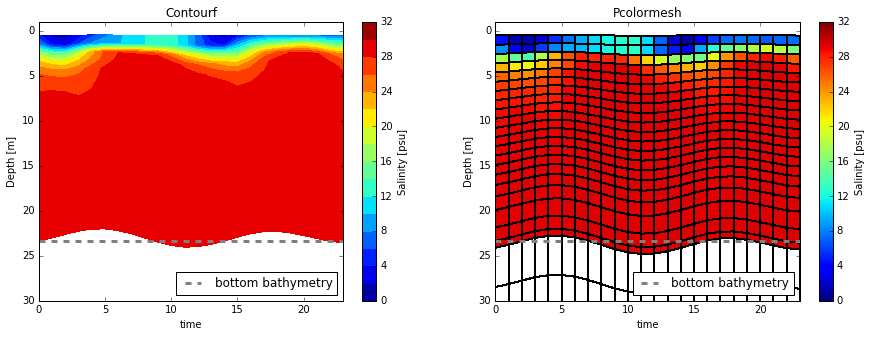

In [21]:
j=400
i=300
time,_ = np.meshgrid(np.arange(sal.shape[0]),gdept_t[0,:,j,i])
fig,axs = plt.subplots(1,2,figsize=(15,5))
smin=0
smax=32
levels= np.arange(smin,smax+2,2)
sal_m = np.ma.array(sal[:,:,j,i], mask = np.ones(sal[:,:,j,i].shape)-tmask[:,:,j,i])
#contourf
ax=axs[0]
mesh =ax.contourf(time.T,gdept_t[:,:,j,i],
                  sal_m, levels)
ax.set_title('Contourf')
cbar=plt.colorbar(mesh, ax=ax)
cbar.set_label('Salinity [psu]')
ax=axs[1]
mesh =ax.pcolormesh(time.T,gdept_t[:,:,j,i],
                    sal_m,
                    edgecolors='k', vmin=smin, vmax=smax)
ax.set_title('Pcolormesh')
cbar=plt.colorbar(mesh, ax=ax)
cbar.set_label('Salinity [psu]')
for ax in axs:
    ax.set_ylim([30,-1])
    ax.set_xlim([0,23])
    ax.set_ylabel('Depth [m]')
    ax.set_xlabel('time')
    ax.plot([0,24],[bathy[j,i],bathy[j,i]], '--', color='gray', lw=3, label='bottom bathymetry')
    ax.legend(loc=4)


## 2. Depth with ssh removed

Next, think of depth measured relative to ssh = 0 . So, a negative depth means elevated sea surface height. Just subtract sea surface height from depth variable.

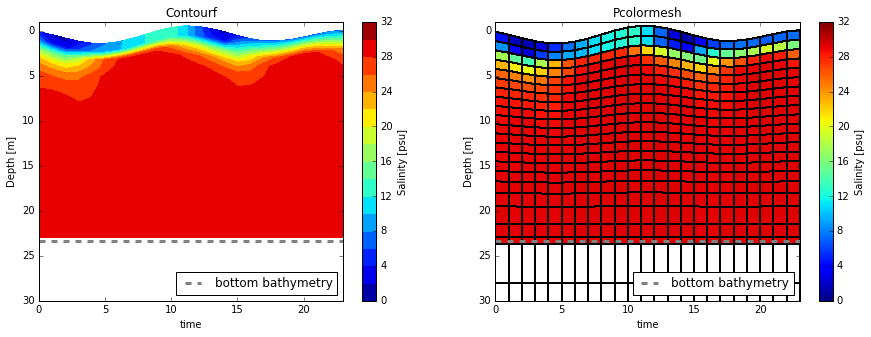

In [22]:
j=400
i=300
time,_ = np.meshgrid(np.arange(sal.shape[0]),gdept_t[0,:,j,i])
fig,axs = plt.subplots(1,2,figsize=(15,5))
smin=0
smax=32
levels= np.arange(smin,smax+2,2)
sal_m = np.ma.array(sal[:,:,j,i], mask = np.ones(sal[:,:,j,i].shape)-tmask[:,:,j,i])
#contourf
ax=axs[0]
mesh =ax.contourf(time.T,gdept_t[:,:,j,i]- np.expand_dims(ssh[:,j,i],axis=1),
                   sal_m, levels)
ax.set_title('Contourf')
cbar=plt.colorbar(mesh, ax=ax)
cbar.set_label('Salinity [psu]')
ax=axs[1]
mesh =ax.pcolormesh(time.T,gdept_t[:,:,j,i] - np.expand_dims(ssh[:,j,i],axis=1),
                    sal_m, edgecolors='k',  vmin=smin, vmax=smax)
ax.set_title('Pcolormesh')
cbar=plt.colorbar(mesh, ax=ax)
cbar.set_label('Salinity [psu]')
for ax in axs:
    ax.set_ylim([30,-1])
    ax.set_xlim([0,23])
    ax.set_ylabel('Depth [m]')
    ax.set_xlabel('time')
    ax.plot([0,24],[bathy[j,i],bathy[j,i]], '--', color='gray', lw=3,label='bottom bathymetry')
    ax.legend(loc=4)

Interesting that the colors extend below the bottom bathymetry with pcolormesh but not with contourf. I think it is because of how pcolormesh decides to color each box. It uses the value at a corner, can't remember which one. To do: look this up in matplotlib. 